<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF280 - Estadística Computacional </h1>
    <h2> Bootstrap </h2>
    <h2> Version: 0.01 </h2>
    <h2> Ay. Nicolás Armijo Calquín </h2> 
    <h2> Ay. Eva Wang Liu </h2>
</center>

<div id='toc'>

## Tabla de Contenidos

* [Introducción](#intro)
* [Bootstrap](#bootstrap)
    * [Paso 1: Identificar los datos](#bootstrap_paso1)
    * [Paso 2: Generar una muestra Bootstrap](#bootstrap_paso2)
    * [Paso 3: Calcular el estadístico de interés de la muestra Bootstrap](#bootstrap_paso3)
    * [Paso 4: Generar la distribución Bootstrap repitiendo los pasos 2 y 3](#bootstrap_paso4)
    * [Paso 5: Estimar el estadístico de interés](#bootstrap_paso5)
* [Intervalos de confianza](#intervalos_confianza)
* [Historial de versiones](#hist)

<div id='intro'>

## Introducción

Cuando intentamos hacer inferencias a partir de un conjunto de datos, nos encontramos con el desafío de que las distribuciones de probabilidad pueden ser complejas o no seguir una forma estándar. De esta forma, el método de estimación Bootstrap se presenta como una herramienta estadística que permite estimar la distribución de un estadístico sin necesidad de hacer suposiciones sobre la distribución del conjunto de datos.

En términos sencillos, el método Bootstrap consiste en crear múltiples muestras del conjunto de datos original mediante remuestreo con reemplazo y calcular el estadístico de interés para cada muestra generada. Al analizar la distribución de los estadísticos, podemos obtener estimaciones más precisas y robustas, como intervalos de confianza, sin depender de supuestos.

En el presente Jupyter Notebook exploraremos la aplicación del método Bootstrap utilizando las librerías NumPy y Pandas de Python para estimar estadísticos relevantes. También veremos cómo construir intervalos de confianza y evaluar la precisión de nuestro estimador.

Antes de partir, importaremos las librerías que complementarán nuestro trabajo:

In [1]:
# Importamos librerías complementarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un nuevo RNG
rng = np.random.default_rng(0)

<div id='bootstrap'>

## Bootstrap

El método de estimación Bootstrap es una técnica que proporciona estimaciones robustas y confiables de los parámetros de interés en una muestra de datos. A través de remuestreo y aproximaciones de la distribución, obtenemos medidas de precisión como intervalos de confianza, incluso en situaciones no normales o con datos atípicos.

Los pasos a seguir son los siguientes:

<div id='bootstrap_paso1'>

### Paso 1: Identificar los datos

En primer lugar, debemos obtener un conjunto de datos original, que corresponde a una muestra representativa de observaciones de la población de interés. A partir de este conjunto, calcularemos sus estadísticos de interés. Por lo tanto, esta muestra sirve como base para las estimaciones posteriores mediante el método Bootstrap.

In [2]:
# Leemos un conjunto de datos
datos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length_in_cm", "sepal_width_in_cm", "petal_length_in_cm", "petal_width_in_cm", "class"])["petal_width_in_cm"]

datos

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width_in_cm, Length: 150, dtype: float64

<div id='bootstrap_paso2'>

### Paso 2: Generar una muestra Bootstrap

Generar una muestra Bootstrap implica crear una nueva muestra de datos a partir del conjunto de datos original. Esta muestra tiene las siguientes propiedades:

- Sus elementos son seleccionados **aleatoriamente** del conjunto de datos original, con **reemplazo**, significando que un mismo dato puede ser seleccionado varias veces o no ser seleccionado.
- Es del **mismo tamaño** que el conjunto de datos original, manteniendo la consistencia en el número de observaciones.

In [3]:
# Generamos una muestra Bootstrap 
muestra_bootstrap = rng.choice(a=datos, size=len(datos), replace=True)

muestra_bootstrap

array([1.8, 1.2, 1.4, 0.3, 0.2, 0.3, 0.2, 0.2, 0.4, 2. , 1.3, 2.4, 1.4,
       1.2, 2.3, 2.5, 1.3, 1. , 1.6, 2.4, 0.3, 2. , 2.5, 0.2, 1.4, 2.1,
       1.6, 0.4, 2.4, 2.5, 1.8, 0.4, 0.1, 1.6, 0.2, 1. , 0.1, 0.4, 1.5,
       1.4, 1. , 0.2, 0.2, 0.3, 0.2, 2.5, 1.5, 1.3, 0.2, 1.2, 2.4, 1. ,
       1.1, 1.8, 2.3, 2. , 1.6, 2.1, 1.9, 1.3, 1.8, 1.8, 2.1, 1.3, 2. ,
       0.2, 1.5, 1.8, 1.8, 1.5, 1.6, 0.2, 1.4, 1.5, 1.8, 1.5, 0.2, 2.4,
       1. , 1.3, 2.5, 1.6, 0.2, 0.2, 1.8, 1.3, 1.4, 1.4, 2.4, 1.3, 0.2,
       1.5, 0.2, 0.1, 1.8, 1. , 0.2, 0.1, 1.6, 2.1, 1. , 2.3, 0.2, 0.2,
       2.3, 2. , 0.2, 0.2, 2.5, 1.4, 1.5, 0.2, 1.6, 1. , 1.4, 1.5, 2.1,
       0.1, 2.3, 0.2, 1.6, 1. , 1.8, 0.2, 2.3, 0.1, 1. , 1.3, 1.4, 0.4,
       2.3, 2.5, 1.5, 0.2, 2. , 2.3, 0.2, 1.5, 1.2, 0.4, 1.4, 1.3, 2.4,
       2.1, 1.5, 1.5, 1.3, 2.3, 0.2, 1.3])

<div id='bootstrap_paso3'>

### Paso 3: Calcular el estadístico de interés de la muestra Bootstrap

Para la muestra Bootstrap, debemos calcular el estadístico de interés, el cual puede ser la media, la mediana, la desviación estándar, la varianza u otro parámetro de relevancia según el análisis.

En nuestro ejemplo, calcularemos la media de la muestra Bootstrap generada anteriormente:

In [4]:
# Calculamos el estadístico de interés
estadistico = np.mean(muestra_bootstrap)

estadistico

1.278

<div id='bootstrap_paso4'>

### Paso 4: Generar la distribución Bootstrap repitiendo los pasos 2 y 3

Luego, debemos generar una distribución de los estadísticos obtenidos a partir de la muestra Bootstrap. Esto se logra repitiendo los pasos 2 y 3 un gran número de veces (por ejemplo, 10000 veces), lo que nos permite obtener una representación empírica de la variabilidad del estadístico de interés.

In [5]:
# Generamos la distribución Bootstrap
distribucion = []
for i in range(10000): # Iteramos 10000 veces
    muestra_bootstrap = rng.choice(a=datos, size=len(datos), replace=True) # Generamos una muestra Bootstrap 
    estadistico = np.mean(muestra_bootstrap) # Calculamos el estadístico de interés de la muestra Bootstrap
    distribucion.append(estadistico) # Agregamos el estadístico de interés de la muestra Bootstrap en la distribución Bootstrap

Podemos graficar la distribución de los estadísticos obtenidos a partir de las muestras Bootstrap para visualizar su comportamiento y variabilidad. Además, resulta útil incluir el valor del estadístico del conjunto de datos original para compararlo con la distribución de los remuestreos y evaluar cómo se posiciona dentro de ella.

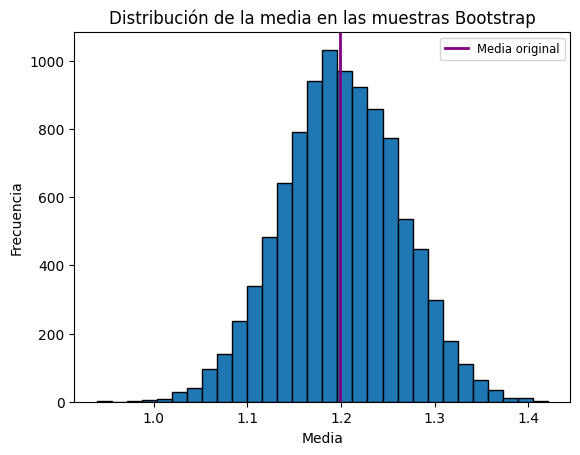

In [6]:
# Graficamos la distribución Bootstrap
plt.hist(distribucion, edgecolor='black', bins=30)
plt.axvline(np.mean(datos), color='purple', linewidth=2, label='Media original')
plt.title('Distribución de la media en las muestras Bootstrap')
plt.ylabel('Frecuencia')
plt.xlabel('Media')
plt.legend(fontsize='small')
plt.show()

<div id='bootstrap_paso5'>

### Paso 5: Estimar el estadístico de interés

Finalmente, la estimación del estadístico de interés se puede obtener calculando la media de los valores en la distribución Bootstrap. Esta media es una estimación puntual del estadístico de interés, que se considera más confiable porque tiene en cuenta la variabilidad observada en los remuestreos.

In [7]:
# Estimamos el estadístico de interés de la distribución Bootstrap
np.mean(distribucion)

1.2003246

Nótese la diferencia con la media del conjunto de datos original:

In [8]:
# Calculamos el estadístico de interés del conjunto de datos original
np.mean(datos)

1.1986666666666668

<div id='intervalo_confianza'>

## Intervalo de confianza

Por otro lado, calculamos el intervalo de confianza con el objetivo de determinar el rango de valores dentro del cual es probable que se encuentre el estadístico de interés con un cierto nivel de confianza. Por ejemplo, para obtener un intervalo de confianza del 95%, calculamos los percentiles 2,5% y 97.5% de la distribución Bootstrap, debido a que el intervalo de confianza cubre el 95% de los valores generados en los remuestreos, dejando fuera el 2,5% inferior y el 2,5% superior.

In [9]:
# Calculamos los límites del intervalo de confianza
limite_inferior = np.percentile(distribucion, 2.5)
limite_superior = np.percentile(distribucion, 97.5)

limite_inferior, limite_superior

(1.0766666666666667, 1.3220166666666664)

Luego, podemos graficar nuestro intervalo de confianza:

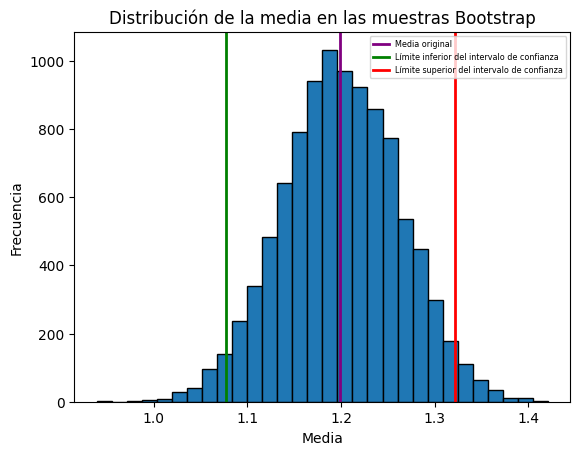

In [10]:
# Graficamos la distribución Bootstrap junto a los límites de su intervalo de confianza
plt.hist(distribucion, edgecolor='black', bins=30)
plt.axvline(np.mean(datos), color='purple', linewidth=2, label='Media original')
plt.axvline(limite_inferior, color="green", linewidth=2, label="Límite inferior del intervalo de confianza")
plt.axvline(limite_superior, color="red", linewidth=2, label="Límite superior del intervalo de confianza")
plt.title('Distribución de la media en las muestras Bootstrap')
plt.ylabel('Frecuencia')
plt.xlabel('Media')
plt.legend(fontsize='xx-small')
plt.show()

<div id='hist'>

# Historial de Versiones 

* **Versión v0.01:** Primera versión del material. - *12 de Noviembre del 2024*.